# Práctico 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
#Read the data from the CSV file
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Columnas:
+ **Identificatorios**: `show_id`
+ **Caracteristicas**: `type`,`title`, `duration`,`description`
+ **Fechas**: `date_added`, `release_year`
+ **Otros**: `director`, `cast`, `country`, `rating`, `listed_in`

In [36]:
#Colours
colours = ['#f5f5f1', '#e50914', '#b20710', '#221f1f'] 

+ ### **Primera parte: Tipo de show más frecuente**

In [44]:
#Dictionary of the genres
replace_dict = {
    'International TV Shows': 'Int. Shows',
    'Korean TV Shows': 'Korean Shows',
    'Romantic TV Shows' : 'Romcoms',
    'British TV Shows': 'British Shows' ,
    'Crime TV Shows': 'Crime Shows',
    
}       

In [13]:
#Filter of TV shows that divides the listed_in data
df_tv = df[df['type'] == 'TV Show']

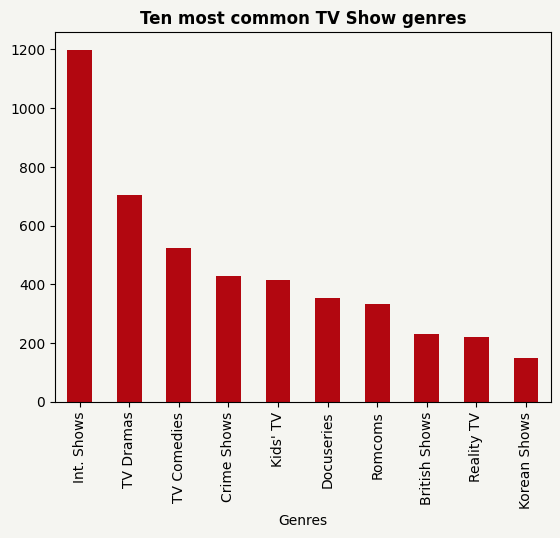

In [45]:
#Cast 'listed_in' to string
df_tv['listed_in'] = df_tv['listed_in'].astype(str)

#Dropping the null values and separating them
df_tv = df_tv.dropna(subset=['listed_in'])
div_genres = df_tv['listed_in'].str.split(', ').explode()

div_genres = div_genres.replace(replace_dict)
genre_count = div_genres.value_counts().head(10)
fig, ax = plt.subplots()

#Creating the chart
fig.patch.set_facecolor(color=colours[0])
bar_colours = [colours[2]] * 10

genre_count.plot(kind='bar', color=bar_colours, ax=ax)

ax.set_title('Ten most common TV Show genres', fontweight = 'bold')
ax.set_xlabel('Genres')

ax.set_facecolor(colours[0])

plt.show()

+ ### **Segunda pregunta: Año con más pelis y series producidas**

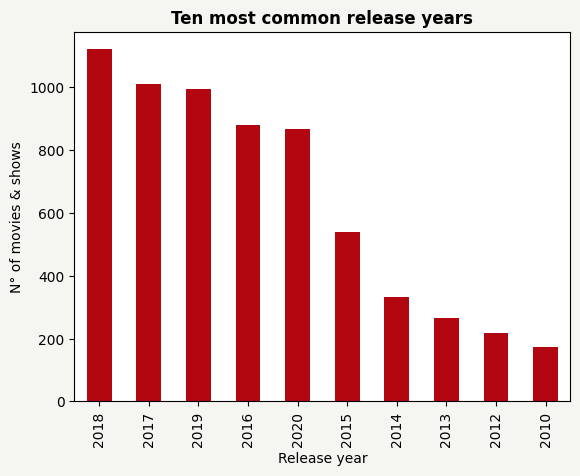

In [47]:
#Count release_year and plot the ten most common years
df['release_year'] = df['release_year'].astype(int)

release_year_count = df['release_year'].value_counts().head(10)

#Plotting
fig, ax = plt.subplots()
fig.patch.set_facecolor(color=colours[0])
bar_colours = [colours[2]] * 10
release_year_count.plot(kind='bar', color=bar_colours, ax=ax)
ax.set_title('Ten most common release years', fontweight = 'bold')
ax.set_xlabel('Release year')
ax.set_ylabel('N° of movies & shows')
plt.show()

+ ### **Tercera pregunta: Países con más pelis y series producidas**

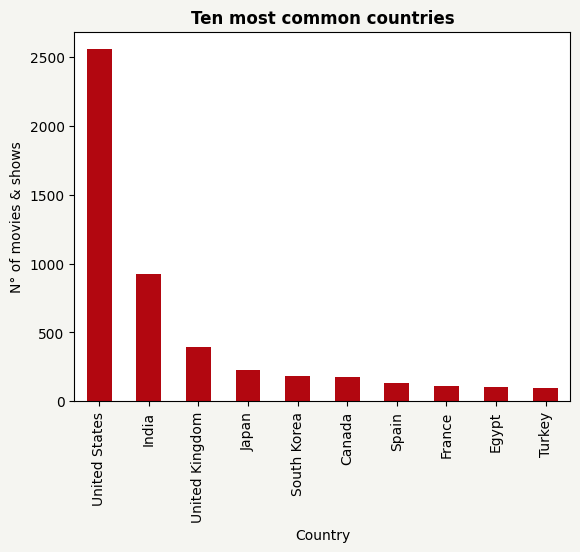

In [55]:
#Converting to string and discarding nan values
df['country'] = df['country'].astype(str)
df = df[df['country'].str.lower() != 'nan']

#Counting the countries and plotting the ten most common
country_count = df['country'].value_counts().head(10)

#Plotting
fig, ax = plt.subplots()
fig.patch.set_facecolor(color=colours[0])
bar_colours = [colours[2]] * 10
country_count.plot(kind='bar', color=bar_colours, ax=ax)
ax.set_title('Ten most common countries', fontweight = 'bold')
ax.set_xlabel('Country')
ax.set_ylabel('N° of movies & shows')
plt.show()